In [1]:
from bpr_model import BPR
from dataloader import AmazonDataset
from training import TrainIterater
from evaluate import Evaluater

import optuna

/home/szk_t/workspace/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/szk_t/workspace/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
dataset = AmazonDataset('./data')

early stopping するか？

In [3]:
# ハイパラ
# embed_dim
# batch_size
# weight_decay, lr, warmup, lr_decay_every, lr_decay_rate
# optimizer

def objective(trial):
    
    embedding_dim = trial.suggest_discrete_uniform('embedding_dim', 16, 64, 16)
    bpr = BPR(int(embedding_dim), len(dataset.user_list), len(dataset.item_list))
    
    batch_size = trial.suggest_discrete_uniform('batch_size', 64, 256, 64)
    iterater = TrainIterater(batch_size=int(batch_size))
    
    lr= trial.suggest_loguniform('lr', 1e-5, 1e-2)
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-6, 1e-2)
    #warmup = trial.suggest_int('warmup', 100, 500)
    warmup = trial.suggest_int('warmup', 1, 5)
    lr_decay_every = trial.suggest_int('lr_decay_every', 1, 5)
    lr_decay_rate = trial.suggest_uniform('lr_decay_rate', 0.5, 1)
    
    score =iterater.iterate_epoch(bpr, lr=lr, epoch=10, weight_decay=weight_decay, warmup=warmup,
                           lr_decay_rate=lr_decay_rate, lr_decay_every=lr_decay_every, eval_every=5)
    
    return -1 * score

epoch: 4  precision: 0.007035822121918235
epoch: 9  precision: 0.006218666129805553


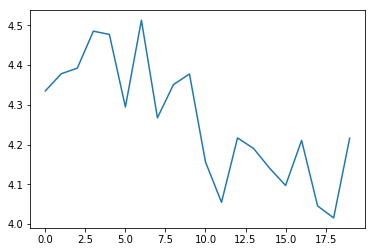

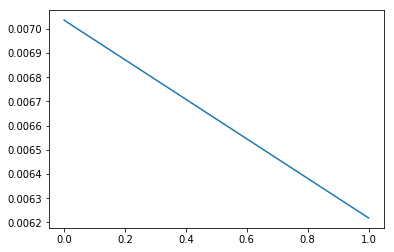

[I 2020-07-03 18:24:13,516] Finished trial#0 with value: 0.006218666129805553 with parameters: {'embedding_dim': 64.0, 'batch_size': 128.0, 'lr': 4.963648862161232e-05, 'weight_decay': 0.00037352981861465804, 'warmup': 2, 'lr_decay_every': 4, 'lr_decay_rate': 0.6607149870149275}. Best is trial#0 with value: 0.006218666129805553.


epoch: 4  precision: 0.006398017670493009
epoch: 9  precision: 0.005439663624386311


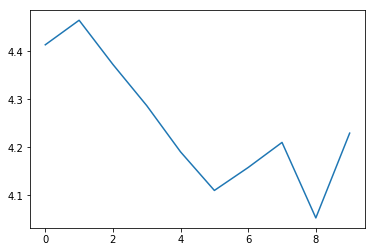

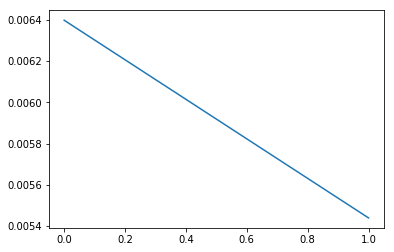

[I 2020-07-03 18:24:23,453] Finished trial#1 with value: 0.005439663624386311 with parameters: {'embedding_dim': 64.0, 'batch_size': 192.0, 'lr': 7.867325762865953e-05, 'weight_decay': 0.0007700334439276717, 'warmup': 1, 'lr_decay_every': 1, 'lr_decay_rate': 0.817163416309224}. Best is trial#1 with value: 0.005439663624386311.


In [4]:
study = optuna.create_study()
study.optimize(objective, n_trials=2)

In [1]:
df = study.trials_dataframe() # pandasのDataFrame形式
df.to_csv('hyparams_result.csv')

NameError: name 'study' is not defined